In [6]:
import requests
app_id = "8E9DD5B3-51F9-40BF-A851-F639C6C4A888"
token = "0c3cd6f3ad79ee8c40fe51cad7ede9ae1271b784"
headers = {
'Api-Token': token
}

r = requests.get(f"https://api-{app_id}.sendbird.com/v3/users", headers=headers)
print(r.content)

b'{"users":[{"user_id":"2","nickname":"sayantan9834","profile_url":"https:\\/\\/sendbird.com\\/main\\/img\\/profiles\\/profile_05_512px.png","require_auth_for_profile_image":false,"metadata":{"font_color":"black","font_preference":"times new roman"},"created_at":1699388578,"is_hide_me_from_friends":false,"is_online":false,"last_seen_at":-1,"is_active":true,"has_ever_logged_in":false,"preferred_languages":[],"discovery_keys":[],"phone_number":""},{"user_id":"sayantan","nickname":"","profile_url":"","require_auth_for_profile_image":false,"metadata":{},"created_at":1698940290,"is_hide_me_from_friends":false,"is_online":false,"last_seen_at":-1,"is_active":true,"has_ever_logged_in":true,"preferred_languages":[],"discovery_keys":[],"phone_number":""},{"user_id":"suryadipta","nickname":"","profile_url":"","require_auth_for_profile_image":false,"metadata":{},"created_at":1698940279,"is_hide_me_from_friends":false,"is_online":false,"last_seen_at":-1,"is_active":true,"has_ever_logged_in":true,"p

In [7]:
# Import pandas and faker libraries
from faker import Faker
import pandas as pd
# Create a faker object
fake = Faker()


# Define a function to generate a random employee age
def generate_age():
    return fake.random_int(min=18, max=65)

# Define a function to generate a random employee sex
def generate_sex():
    return fake.random_element(elements=("M", "F"))

data = []

# Generate 10 rows of fake data and append them to the list
for i in range(60):
    data.append({
        "email": fake.email(),
        "name": fake.name(),
        "age": generate_age(),
        "sex": generate_sex()
    })

# Create an empty dataframe with the columns of the class EmployeeDetails
df1 = pd.DataFrame(data, columns=["email","name", "age", "sex"])

# Print the dataframe
df1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   email   60 non-null     object
 1   name    60 non-null     object
 2   age     60 non-null     int64 
 3   sex     60 non-null     object
dtypes: int64(1), object(3)
memory usage: 2.0+ KB


In [6]:
df1.to_csv('user.csv',index=False)

In [8]:
def create_user(row):
    bpdy = {
    "user_id": row['email'],
    "nickname": row['name'],
    "profile_url": "https://sendbird.com/main/img/profiles/profile_05_512px.png",
    "issue_access_token": True
}

    r = requests.post(f"https://api-{app_id}.sendbird.com/v3/users", json=bpdy, headers=headers)
    print(r.content)

df1.apply(create_user, axis=1)

b'{"user_id":"hcohen@example.net","nickname":"Dr. Roberta Riggs DVM","profile_url":"https:\\/\\/sendbird.com\\/main\\/img\\/profiles\\/profile_05_512px.png","require_auth_for_profile_image":false,"metadata":{},"access_token":"2e17a6746bc106489c384e6479ee919f7026e674","session_tokens":[],"is_online":false,"last_seen_at":-1,"discovery_keys":[],"has_ever_logged_in":false,"is_active":true,"is_created":true,"phone_number":""}'
b'{"user_id":"daniellegates@example.com","nickname":"Nicole Andrews","profile_url":"https:\\/\\/sendbird.com\\/main\\/img\\/profiles\\/profile_05_512px.png","require_auth_for_profile_image":false,"metadata":{},"access_token":"3fac8ad5b01192f3343c248cc9b421008845a9ef","session_tokens":[],"is_online":false,"last_seen_at":-1,"discovery_keys":[],"has_ever_logged_in":false,"is_active":true,"is_created":true,"phone_number":""}'
b'{"user_id":"dsmith@example.net","nickname":"Jennifer Collins","profile_url":"https:\\/\\/sendbird.com\\/main\\/img\\/profiles\\/profile_05_512px.p

0     None
1     None
2     None
3     None
4     None
5     None
6     None
7     None
8     None
9     None
10    None
11    None
12    None
13    None
14    None
15    None
16    None
17    None
18    None
19    None
20    None
21    None
22    None
23    None
24    None
25    None
26    None
27    None
28    None
29    None
30    None
31    None
32    None
33    None
34    None
35    None
36    None
37    None
38    None
39    None
40    None
41    None
42    None
43    None
44    None
45    None
46    None
47    None
48    None
49    None
50    None
51    None
52    None
53    None
54    None
55    None
56    None
57    None
58    None
59    None
dtype: object

In [17]:
a = (df1['email'].iloc[35:]).tolist()
a

['alfredmiller@example.org',
 'ablackwell@example.net',
 'onavarro@example.com',
 'morrisamber@example.net',
 'ann33@example.net',
 'stephenskimberly@example.net',
 'kara49@example.net',
 'chogan@example.com',
 'kimberly84@example.com',
 'williamsmith@example.org',
 'mosspreston@example.org',
 'kathryn12@example.org',
 'pjohnson@example.com',
 'yadams@example.net',
 'emily13@example.net',
 'andremaddox@example.net',
 'lisacole@example.org',
 'danielward@example.com',
 'rebecca94@example.org',
 'rsilva@example.org',
 'strongmichelle@example.net',
 'tanya30@example.com',
 'hernandezsean@example.net',
 'amberhendrix@example.net',
 'anthony86@example.net']

In [10]:
mod = ['jason72@example.org',
       'cervantesheather@example.com']

In [18]:

body = {

    "name": "Business Team",

    "is_distinct": False,

    "user_ids": a,
    "custom_type": "Operations",
    "is_ephemeral": False,

    "operator_ids": [mod[0], mod[1], a[1], a[3],a[7]]

}

g = requests.post(
    f"https://api-{app_id}.sendbird.com/v3/group_channels", json=body, headers=headers)

g.json()

{'channel_url': 'sendbird_group_channel_67347509_6cc48464fc11154c8cde67c3c98a873a32593782',
 'name': 'Business Team',
 'cover_url': 'https://static.sendbird.com/sample/cover/cover_11.jpg',
 'data': '',
 'member_count': 25,
 'joined_member_count': 25,
 'max_length_message': 5000,
 'created_at': 1699708214,
 'custom_type': 'Operations',
 'is_distinct': False,
 'is_super': False,
 'is_broadcast': False,
 'is_public': False,
 'is_discoverable': False,
 'freeze': False,
 'is_ephemeral': False,
 'unread_message_count': 0,
 'unread_mention_count': 0,
 'ignore_profanity_filter': False,
 'id': 104931923,
 'channel': {'channel_url': 'sendbird_group_channel_67347509_6cc48464fc11154c8cde67c3c98a873a32593782',
  'name': 'Business Team',
  'cover_url': 'https://static.sendbird.com/sample/cover/cover_11.jpg',
  'data': '',
  'created_at': 1699708214,
  'custom_type': 'Operations',
  'max_length_message': 5000,
  'member_count': 25},
 'created_by': None,
 'disappearing_message': {'is_triggered_by_mess

In [26]:
g.content

b'{"error":true,"message":"Invalid value: \\"JSON body.\\".","code":400403}'

In [84]:
lg = requests.get(f"https://api-{app_id}.sendbird.com/v3/group_channels/sendbird_group_channel_67347509_6cc48464fc11154c8cde67c3c98a873a32593782",headers=headers)
chann = lg.json()
# chann['members']
chann

{'channel_url': 'sendbird_group_channel_67347509_6cc48464fc11154c8cde67c3c98a873a32593782',
 'name': 'Business Team',
 'cover_url': 'https://static.sendbird.com/sample/cover/cover_11.jpg',
 'data': '',
 'member_count': 25,
 'joined_member_count': 25,
 'max_length_message': 5000,
 'created_at': 1699708214,
 'custom_type': 'Operations',
 'is_distinct': False,
 'is_super': False,
 'is_broadcast': False,
 'is_public': False,
 'is_discoverable': False,
 'freeze': False,
 'is_ephemeral': False,
 'unread_message_count': 0,
 'unread_mention_count': 0,
 'ignore_profanity_filter': False,
 'id': 104931923,
 'channel': {'channel_url': 'sendbird_group_channel_67347509_6cc48464fc11154c8cde67c3c98a873a32593782',
  'name': 'Business Team',
  'cover_url': 'https://static.sendbird.com/sample/cover/cover_11.jpg',
  'data': '',
  'created_at': 1699708214,
  'custom_type': 'Operations',
  'max_length_message': 5000,
  'member_count': 25},
 'created_by': None,
 'disappearing_message': {'is_triggered_by_mess

In [30]:
users = []
for member in chann['members']:
    users.append(member['user_id'])
users

['lisa28@example.org',
 'grant48@example.org',
 'williamserika@example.org',
 'mossjonathan@example.com',
 'michelle42@example.org',
 'joeljohnson@example.com',
 'ulopez@example.com',
 'edwardfields@example.org',
 'daviskelly@example.org',
 'cbaker@example.com',
 'ewarren@example.net',
 'cervantesheather@example.com',
 'jason72@example.org',
 'michael57@example.org',
 'christopherhart@example.net',
 'janetsmith@example.net',
 'vanessawheeler@example.com',
 'dsmith@example.net',
 'daniellegates@example.com',
 'hcohen@example.net']

In [69]:
800-502

298

In [32]:
import time
import random
import pandas as pd

def send_message(texts):
    channel = "sendbird_group_channel_67347472_64095c2b55e2ca1305da6aabf1c8ecc7a7adb646"
    for text in texts:
        ind = random.randint(0, len(users)-1)
        msg_body = {
            "message_type": "MESG",
            "user_id": users[ind],
            "message": text
        }
        print(msg_body)
        r = requests.post(f"https://api-{app_id}.sendbird.com/v3/group_channels/{channel}/messages",json=msg_body,headers=headers)
        print(r.json())
        time.sleep(9)
msg = pd.read_csv('a.csv')
text = msg['text'].iloc[502:800]
msg['text'].value_counts

send_message(text)

{'message_type': 'MESG', 'user_id': 'edwardfields@example.org', 'message': 'Props to @Karen_Clifford_ for creating a beautiful human being. The earth is blessed with your creation momma clifford'}
{'type': 'MESG', 'message_id': 837153364, 'message': 'Props to @Karen_Clifford_ for creating a beautiful human being. The earth is blessed with your creation momma clifford', 'data': '', 'custom_type': '', 'file': {}, 'created_at': 1699712367929, 'user': {'user_id': 'edwardfields@example.org', 'profile_url': 'https://sendbird.com/main/img/profiles/profile_05_512px.png', 'require_auth_for_profile_image': False, 'nickname': 'Michael Good', 'metadata': {}, 'role': '', 'is_active': True}, 'channel_url': 'sendbird_group_channel_67347472_64095c2b55e2ca1305da6aabf1c8ecc7a7adb646', 'updated_at': 0, 'message_survival_seconds': -1, 'mentioned_users': [], 'mention_type': 'users', 'silent': False, 'message_retention_hour': -1, 'channel_type': 'group', 'translations': {}, 'is_removed': False, 'is_op_msg':

In [64]:
m.status_code

200

In [53]:
from datetime import datetime
import pytz

# Set the timezone to India
india_timezone = pytz.timezone('Asia/Kolkata')

# Get the current time in the India timezone
date_time = datetime.now(india_timezone)
print(date_time)
print(date_time.timestamp())
# Convert the datetime object to Unix milliseconds
unix_milliseconds = int(date_time.timestamp() * 1000)

print(unix_milliseconds)


2023-11-11 21:01:55.430518+05:30
1699716715.430518
1699716715430


In [95]:
mg = requests.get(f"https://api-{app_id}.sendbird.com/v3/group_channels/sendbird_group_channel_67347505_bc754d195203358f37d2f3a94c5df625a9fa555c/",headers=headers)
a = mg.json()
if a['last_message']:
    print("hello")

In [80]:
messages = []
times = set()
import datetime
def change_mili_to_datetime(timestamp_milliseconds: str):
    timestamp_seconds = timestamp_milliseconds / 1000.0
    return datetime.datetime.utcfromtimestamp(timestamp_seconds)
time = 837174147
while(True):
    mg = requests.get(f"https://api-{app_id}.sendbird.com/v3/group_channels/sendbird_group_channel_67347472_64095c2b55e2ca1305da6aabf1c8ecc7a7adb646/messages?message_id={time}&prev_limit=200&next_limit=0",headers=headers)
    a = mg.json()['messages']
    x = 0
    for i in a:
        if x == 0:
            print(i['message_id'])
            x=i['message_id']
        if time != i['message_id']:
            messages.append({
           'msg' : i['message'],
           'create_timestamp': change_mili_to_datetime(i['created_at']),
           'time':i['message_id']
            })
        times.add(i['created_at'])
        
    # print(x)
    # break
    time=x
    print(len(a))
    if (len(a))<200:
        break

print(len(messages))
print(len(times))
messages

837160314
201
837153364
98
297
298


[{'msg': 'RT @PerezHilton: Forget family friendly! These are 12 of the raunchiest Christmas movies ever made! http://t.co/mjFoTaktzP http://t.co/4QyE…',
  'create_timestamp': datetime.datetime(2023, 11, 11, 14, 34, 31, 859000),
  'time': 837160314},
 {'msg': ' its the best show EVER!',
  'create_timestamp': datetime.datetime(2023, 11, 11, 14, 34, 41, 180000),
  'time': 837160386},
 {'msg': 'wait so ok,,,, why did riverdale do that to kj',
  'create_timestamp': datetime.datetime(2023, 11, 11, 14, 34, 50, 510000),
  'time': 837160484},
 {'msg': ' OR... Something to do with all the Red Bull?  Hmmm. You think maybe?',
  'create_timestamp': datetime.datetime(2023, 11, 11, 14, 34, 59, 805000),
  'time': 837160563},
 {'msg': "@The_OA i'm honestly so pissed right now and i have so many regrets",
  'create_timestamp': datetime.datetime(2023, 11, 11, 14, 35, 9, 75000),
  'time': 837160651},
 {'msg': 'Aw .. the grillz in my background look like plaque ..',
  'create_timestamp': datetime.datetime(

In [45]:
a = mg.json()['messages']
print(len(a))
for i in mg.json()['messages']:
    print(i['message'])

200
Props to @Karen_Clifford_ for creating a beautiful human being. The earth is blessed with your creation momma clifford
The dismissed staff members will now take the matter to court unless it can be settled outside .
 OR, just make someone walk on ur back?? I`m a professional back walker-on`er  I could use that too, on the lower regions!
 http://twitpic.com/4jam0 - better lighting would have enhanced the photo... nice angle though...
Hey Mr. No thanks for the follow!
Stefan Zimmermann is now following me on Twitter! Thank you Stefan Zimmermann! Say hello a… https://t.co/aLhyBd1STX https://t.co/Zt0hweAJ8E
Theory of Human Relatability. Chey. Is that even a word.
Space Coast Credit Union West Melbourne https://t.co/d56cYigFsd
Marley won`t watch the French Open unless it`s in HD, which it`s not...   But my latest political ad is: http://tinyurl.com/lvsn76
 I`m 25 in december that`s not good at all next big birthday is 30  after 21 it flys by for sure
 oh he is so cute... is he in united

In [14]:
from transformers import pipeline
classifier = pipeline("text-classification", model="j-hartmann/emotion-english-distilroberta-base")
classifier("I love this!")


[{'label': 'joy', 'score': 0.9771687984466553}]

In [7]:
a = [{'sequence': 'I, oo', 'labels': ['neutral', 'surprise', 'sadness', 'happiness', 'anger', 'disgust', 'fear'], 'scores': [0.29272913932800293, 0.15604683756828308, 0.15167754888534546, 0.130009263753891, 0.09360159188508987, 0.08972392231225967, 0.08621174097061157]}, {'sequence': 'I, psjsjs', 'labels': ['neutral', 'surprise', 'happiness', 'fear', 'sadness', 'disgust', 'anger'], 'scores': [0.3905738592147827,
                                                                                                                                                                                                                                                                                                                                                                                                            0.1504214107990265, 0.09957604855298996, 0.09531453996896744, 0.09153936803340912, 0.08846594393253326, 0.08410877734422684]}, {'sequence': 'I, pddkdkdkdkdsjsjs', 'labels': ['neutral', 'surprise', 'happiness', 'sadness', 'fear', 'anger', 'disgust'], 'scores': [0.3999730348587036, 0.1620524525642395, 0.10795030742883682, 0.0894809365272522, 0.08718480914831161, 0.07776113599538803, 0.07559734582901001]}]

print(a[0])
del a[0]['scores']

a[0]['message'] = a[0].pop('sequence')
print(a[0])

{'sequence': 'I, oo', 'labels': ['neutral', 'surprise', 'sadness', 'happiness', 'anger', 'disgust', 'fear'], 'scores': [0.29272913932800293, 0.15604683756828308, 0.15167754888534546, 0.130009263753891, 0.09360159188508987, 0.08972392231225967, 0.08621174097061157]}
{'labels': ['neutral', 'surprise', 'sadness', 'happiness', 'anger', 'disgust', 'fear'], 'message': 'I, oo'}


In [8]:
x = [{'a' : 1}]
y = [{'b' : 1}]

x+y

[{'a': 1}, {'b': 1}]

In [85]:
import pandas as pd
data = pd.read_csv('a.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       30000 non-null  object
 1   date_time  30000 non-null  object
 2   user_id    30000 non-null  object
 3   label      30000 non-null  object
dtypes: object(4)
memory usage: 937.6+ KB


In [86]:
data.head()

,text,date_time,user_id,label
0,it`s because finished the recordings?,2023-03-14 12:40:21,lisaramirez@example.net,neutral
1,my car is possessed and won`t stop honking at me,2023-03-17 18:28:42,modonnell@example.com,neutral
2,Oh dear #bgt,2023-03-18 11:31:19,edward87@example.net,neutral
3,"Savon koulutuskuntayhtyma , Finland based comp...",2023-03-07 19:30:30,pamelacastillo@example.com,neutral
4,Thank you! Tadi jam 12.30pm,2023-03-25 19:43:35,nicolehester@example.org,gratitude


In [10]:
from transformers import pipeline
classifier = pipeline("text-classification", model="SamLowe/roberta-base-go_emotions")
def predict(row):
    result = classifier(row['text'])
    print(result)
    return result[0]['label']

data['label'] = data.apply(predict, axis=1)

[{'label': 'neutral', 'score': 0.5507226586341858}]
[{'label': 'neutral', 'score': 0.8042758107185364}]
[{'label': 'neutral', 'score': 0.9512578248977661}]
[{'label': 'neutral', 'score': 0.9209464192390442}]
[{'label': 'gratitude', 'score': 0.9858191013336182}]
[{'label': 'approval', 'score': 0.8419679999351501}]
[{'label': 'neutral', 'score': 0.5518887042999268}]
[{'label': 'neutral', 'score': 0.671601414680481}]
[{'label': 'neutral', 'score': 0.8183174133300781}]
[{'label': 'neutral', 'score': 0.8789445161819458}]
[{'label': 'neutral', 'score': 0.7982894778251648}]
[{'label': 'neutral', 'score': 0.9441343545913696}]
[{'label': 'curiosity', 'score': 0.6771304607391357}]
[{'label': 'neutral', 'score': 0.45755377411842346}]
[{'label': 'excitement', 'score': 0.4181515574455261}]
[{'label': 'joy', 'score': 0.6507000923156738}]
[{'label': 'curiosity', 'score': 0.5367586612701416}]
[{'label': 'neutral', 'score': 0.7994682788848877}]
[{'label': 'neutral', 'score': 0.9568619728088379}]
[{'lab

In [11]:
data.to_csv('a.csv',index=False)

In [37]:
LABEL_SCORES = {
    "admiration": 7,
    "amusement": 8,
    "anger": 2,
    "annoyance": 2,
    "approval": 6,
    "caring": 6,
    "confusion": 4,
    "curiosity": 6,
    "desire": 6,
    "realization":5,
    "disappointment": 3,
    "disapproval": 4,
    "disgust": 1,
    "embarrassment": 2,
    "excitement": 8,
    "fear": 0,
    "gratitude": 8,
    "grief": 2,
    "joy": 10,
    "love": 10,
    "nervousness":3,
    "optimism": 8,
    "pride": 7,
    "relief": 6,
    "remorse": 0,
    "surprise": 6,
    "sadness":2,
    "neutral": 5
}

def get_sentiment(label):
    score = LABEL_SCORES[label]
    sentiment = ""
    if score > 6:
        sentiment = 'positive'
    elif score < 4:
        sentiment = 'negative'
    else:
        sentiment = 'neutral'
    return sentiment

data['sent'] = data['label'].apply(get_sentiment)
data.head()

,text,date_time,user_id,label,day_of_week,sent
0,it`s because finished the recordings?,2023-03-14 12:40:21,lisaramirez@example.net,neutral,Tuesday,neutral
1,my car is possessed and won`t stop honking at me,2023-03-17 18:28:42,modonnell@example.com,neutral,Friday,neutral
2,Oh dear #bgt,2023-03-18 11:31:19,edward87@example.net,neutral,Saturday,neutral
3,"Savon koulutuskuntayhtyma , Finland based comp...",2023-03-07 19:30:30,pamelacastillo@example.com,neutral,Tuesday,neutral
4,Thank you! Tadi jam 12.30pm,2023-03-25 19:43:35,nicolehester@example.org,gratitude,Saturday,positive


sent         negative  neutral  positive
day_of_week                             
Friday           1231     4693      2076
Monday            799     2894      1307
Saturday          898     3520      1582
Thursday          626     2332      1042
Tuesday           718     2963      1319
Wednesday         291     1191       518
7844


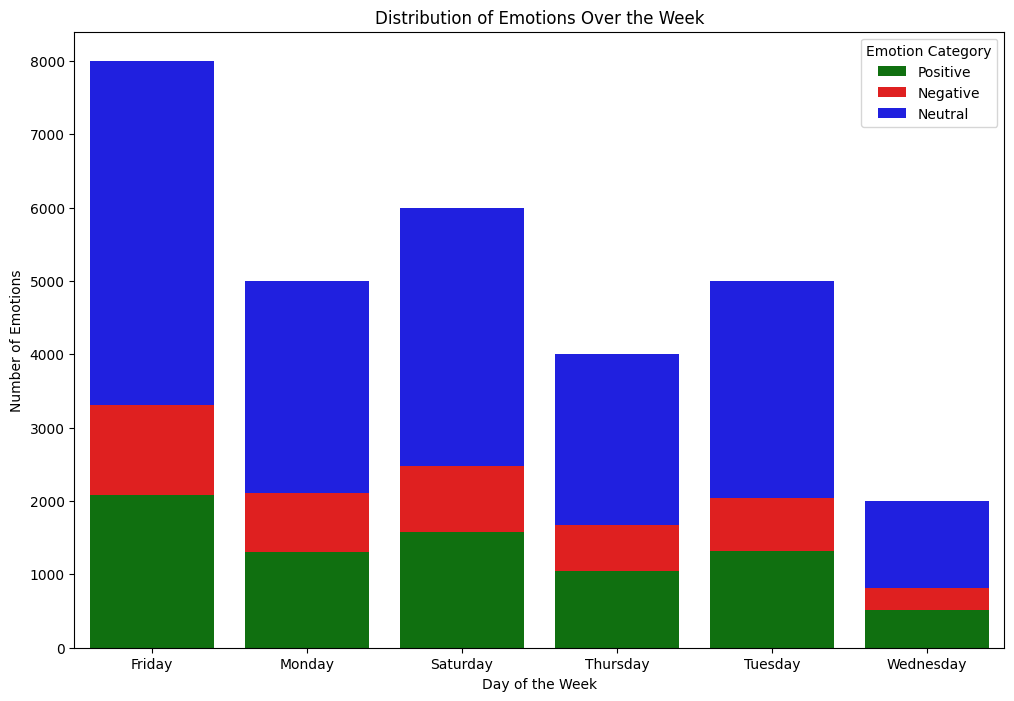

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns
data['date_time'] = pd.to_datetime(data['date_time'])
data['day_of_week'] = data['date_time'].dt.day_name()  # Assuming 'timestamp' is a datetime column
# negative_emotions = data[data['sent'] == 'negative']
emotion_distribution = data.groupby(['day_of_week', 'sent']).size().unstack().fillna(0)
positive_counts = emotion_distribution['positive'].values
negative_counts = emotion_distribution['negative'].values
neutral_counts = emotion_distribution['neutral'].values
print(emotion_distribution)
print(sum(positive_counts))

# Plotting the distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=emotion_distribution.index.get_level_values('day_of_week'), y=positive_counts, color='green', label='Positive')
sns.barplot(x=emotion_distribution.index.get_level_values('day_of_week'), y=negative_counts, color='red', bottom=positive_counts, label='Negative')
sns.barplot(x=emotion_distribution.index.get_level_values('day_of_week'), y=neutral_counts, color='blue', bottom=positive_counts+negative_counts, label='Neutral')

plt.title('Distribution of Emotions Over the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Emotions')
plt.legend(title='Emotion Category')
plt.show()

<Figure size 1200x800 with 0 Axes>

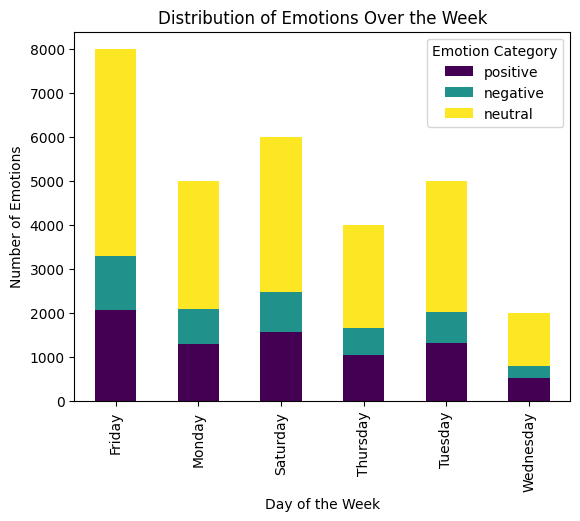

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have a Jupyter notebook for better inline visualization
%matplotlib inline

# Plotting the distribution
# plt.figure(figsize=(10, 6))
# sns.barplot(x=emotion_distribution.index, y=emotion_distribution.values, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
# plt.title('Distribution of Negative Emotions Over the Week')
# plt.xlabel('Day of the Week')
# plt.ylabel('Number of Negative Emotions')
# plt.show()

plt.figure(figsize=(12, 8))
emotion_distribution[['positive', 'negative', 'neutral']].plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Distribution of Emotions Over the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Emotions')
plt.legend(title='Emotion Category')
plt.show()
